# Analysis of Mouse ChIP and Human ChIP data

**Mouse ChIP**
- source: Mazzoni lab

**Human ChIP**
- source


In [7]:
library(repr)

In [40]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=200)

In [9]:
library(tidyverse)

## Mouse

In [10]:
mm.peaks.file <- "/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/mouse_chip_mazzoni/mm_all_genebody_up2k_annotated_peaks.csv"

In [16]:
mm.all.peaks <- read_csv(mm.peaks.file) %>% filter(condition %in% c("NGN2_WT", "ZB18_WT"))

Parsed with column specification:
cols(
  chr = col_character(),
  start = col_double(),
  end = col_double(),
  peakname = col_character(),
  score = col_double(),
  strand = col_character(),
  fc = col_double(),
  p = col_double(),
  q = col_double(),
  apex = col_double(),
  gene_name = col_character(),
  condition = col_character()
)



In [18]:
mm.all.peaks %>% head

chr,start,end,peakname,score,strand,fc,p,q,apex,gene_name,condition
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,3322172,3322369,NGN2_WT_peak_13,29,.,3.94970,5.18069,2.99100,119,XKR4,NGN2_WT
chr1,3507935,3508509,NGN2_WT_peak_14,243,.,9.60012,27.20397,24.38268,374,XKR4,NGN2_WT
chr1,3512633,3513212,NGN2_WT_peak_15,54,.,5.13733,7.82980,5.49612,155,XKR4,NGN2_WT
chr1,4154135,4154674,NGN2_WT_peak_18,1015,.,20.89378,105.11887,101.51904,264,RP1,NGN2_WT
chr1,4774265,4774520,NGN2_WT_peak_30,46,.,4.66227,6.91178,4.61744,82,MRPL15,NGN2_WT
chr1,4786158,4786434,NGN2_WT_peak_31,103,.,3.62972,12.82961,10.33364,85,MRPL15,NGN2_WT


## 1. cut-off analysis on q value

In [353]:
plot_settings <- function() {
    list(
        theme_classic(),
        scale_fill_brewer(type = "qual", palette = "Set2"),
        scale_color_brewer(type = "qual", palette = "Set2")
        )
}

**ZBTB18 is sequenced nearly 2x as deep as NGN2, the number of peaks in ZBTB18 is not significantly higher.**

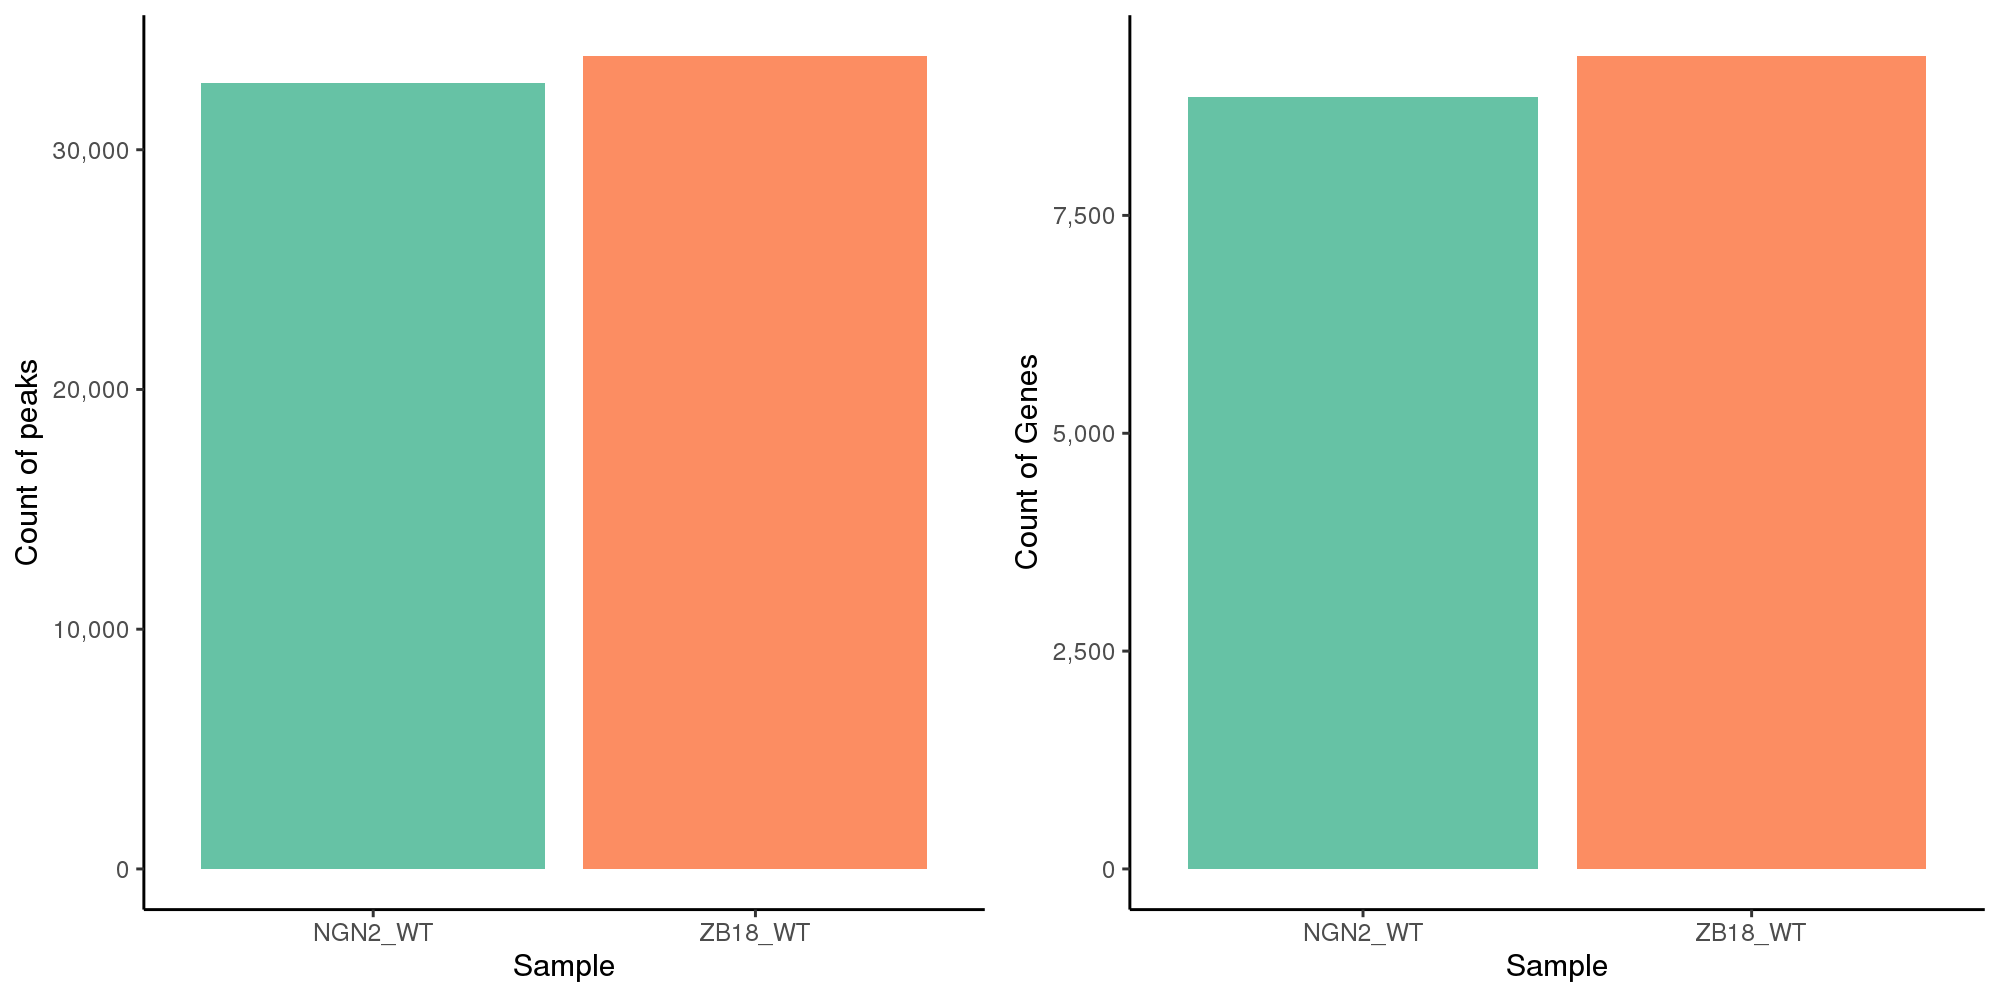

In [354]:
g1 <- mm.all.peaks %>% 
    ggplot() + geom_bar(aes(x = condition, fill = condition)) +
    plot_settings() +
    scale_y_continuous(labels = scales::label_comma()) +
    theme(legend.position = "none") +
    labs(y = "Count of peaks", x = "Sample")

g2 <- mm.all.peaks %>% select(condition, gene_name) %>% unique %>%
    ggplot() + geom_bar(aes(x = condition, fill = condition)) +
    plot_settings() +
    scale_y_continuous(labels = scales::label_comma()) +
    theme(legend.position = "none") +
    labs(y = "Count of Genes", x = "Sample")

gridExtra::grid.arrange(g1, g2, nrow = 1)

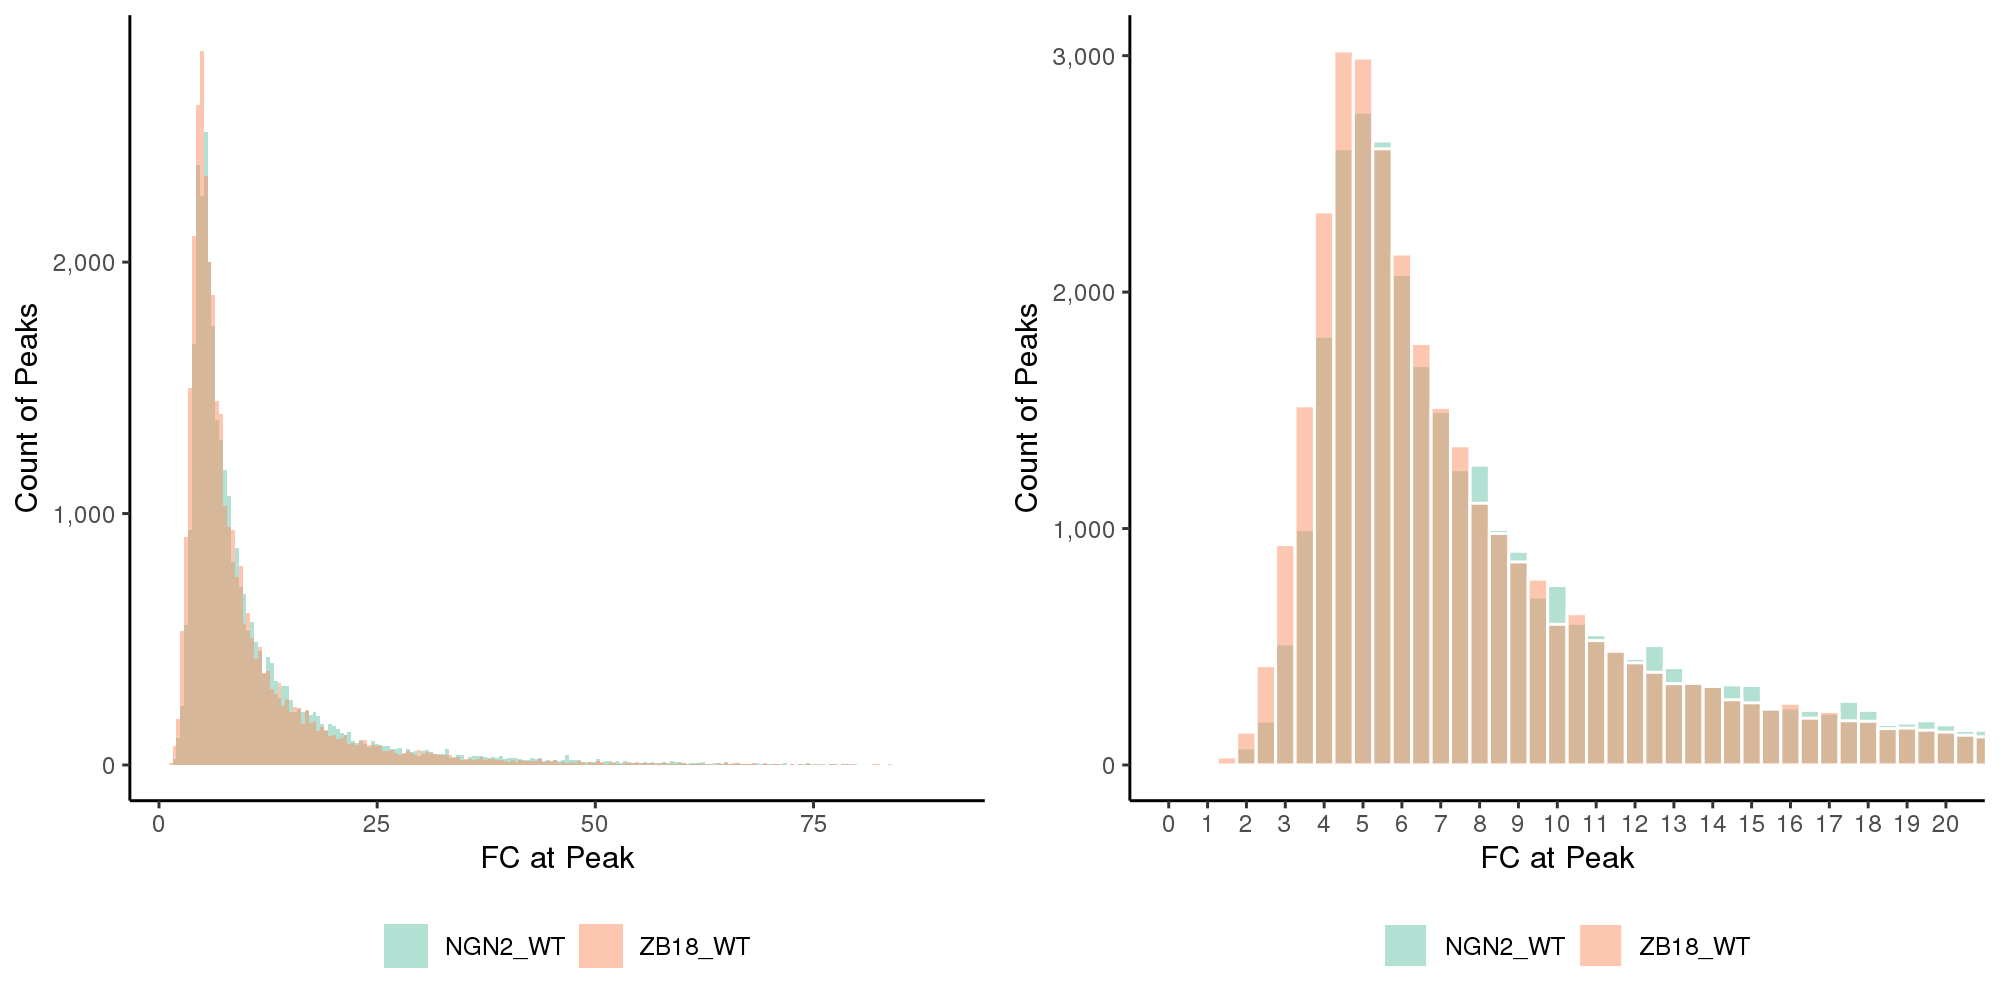

In [355]:
g1 <- mm.all.peaks %>%
    ggplot() + geom_histogram(aes(x = fc, fill = condition), alpha = .5, binwidth = .5, color = "white", position = "identity") +
        plot_settings() +
        coord_cartesian(xlim = c(0, 20)) +
        scale_y_continuous(labels = scales::label_comma()) +
        scale_x_continuous(breaks = seq(0, 20, 1)) +
        theme(legend.position = "bottom") +
        labs(x = "FC at Peak", y = "Count of Peaks") +
        guides(fill = guide_legend(title = NULL))

g2 <- mm.all.peaks %>%
    ggplot() + geom_histogram(aes(x = fc, fill = condition), alpha = .5, bins = 200, position = "identity") +
        plot_settings() +
        scale_y_continuous(labels = scales::label_comma()) +
        theme(legend.position = "bottom") +
        labs(x = "FC at Peak", y = "Count of Peaks") +
        guides(fill = guide_legend(title = NULL))

gridExtra::grid.arrange(g2, g1, nrow = 1)

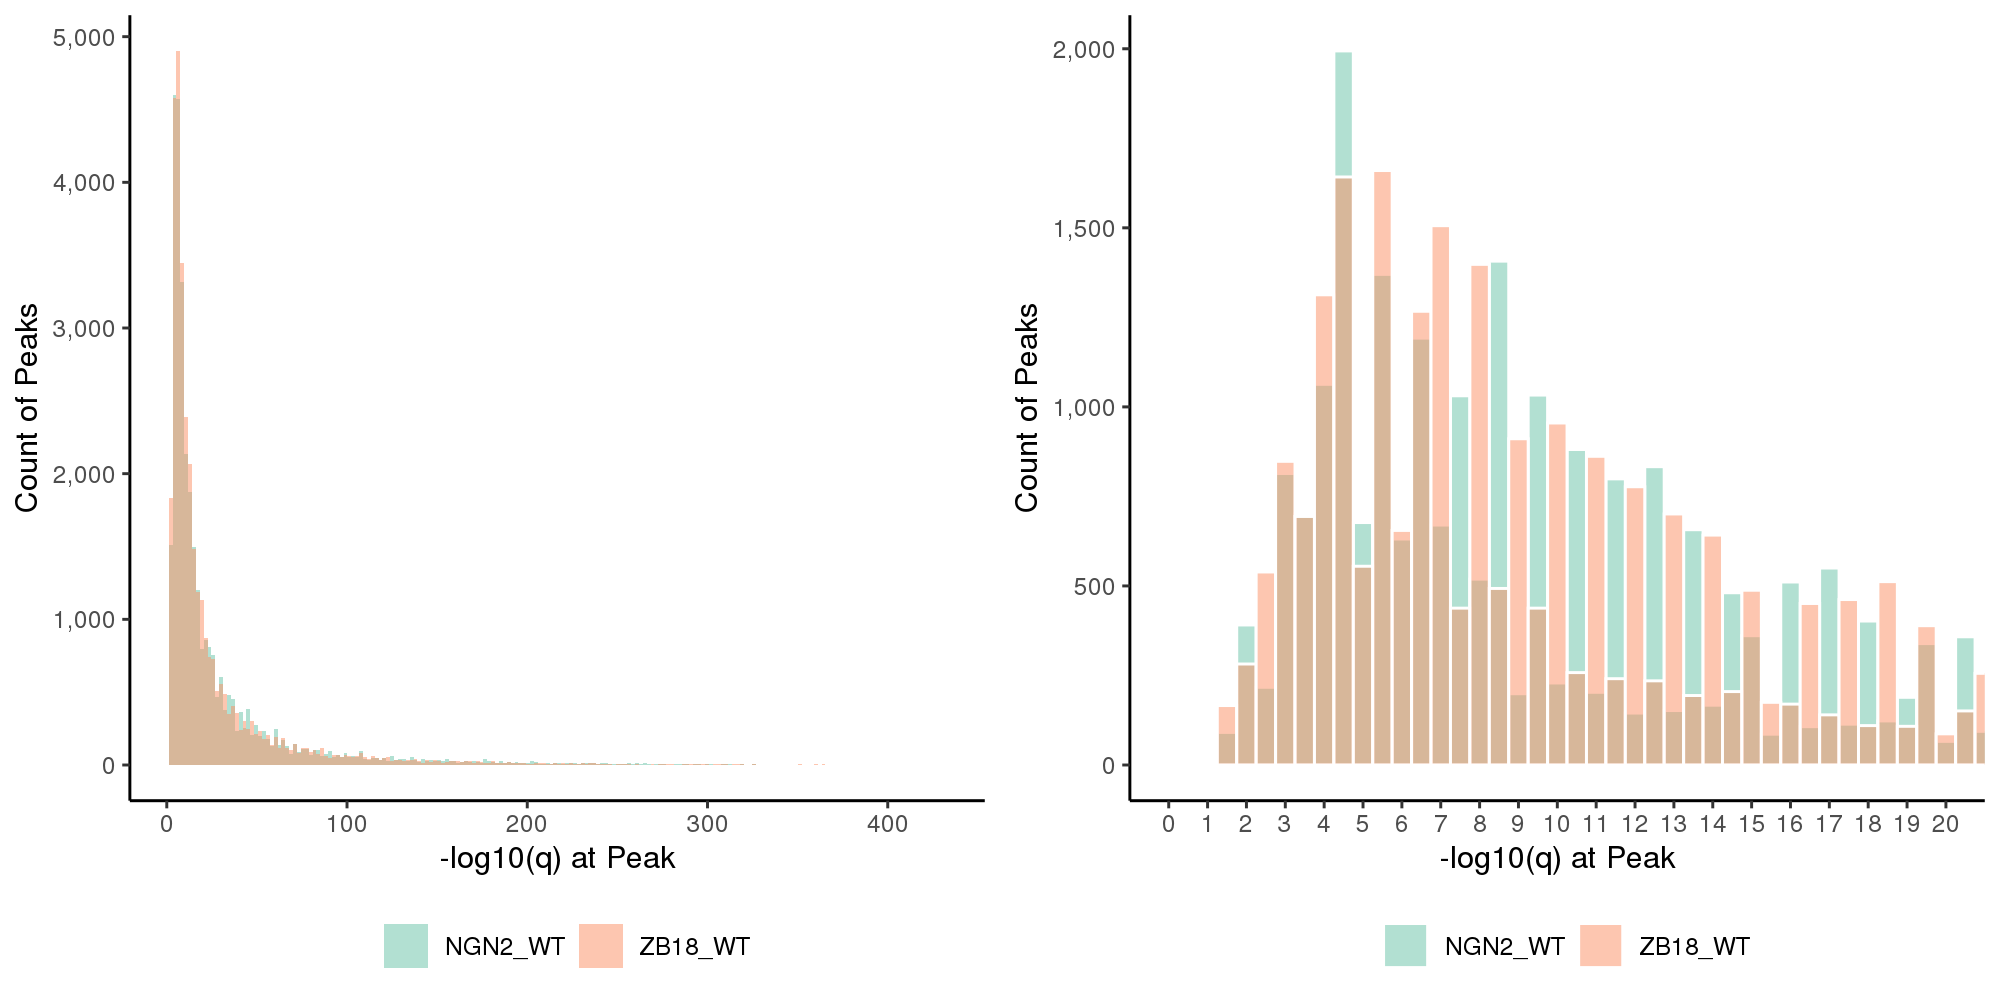

In [356]:
g1 <- mm.all.peaks %>%
    ggplot() + geom_histogram(aes(x = q, fill = condition), alpha = .5, binwidth = .5, color = "white", position = "identity") +
        plot_settings() +
        coord_cartesian(xlim = c(0, 20)) +
        scale_y_continuous(labels = scales::label_comma()) +
        scale_x_continuous(breaks = seq(0, 20, 1)) +
        theme(legend.position = "bottom") +
        labs(x = "-log10(q) at Peak", y = "Count of Peaks") +
        guides(fill = guide_legend(title = NULL))

g2 <- mm.all.peaks %>%
    ggplot() + geom_histogram(aes(x = q, fill = condition), alpha = .5, bins = 200, position = "identity") +
        plot_settings() +
        scale_y_continuous(labels = scales::label_comma()) +
        theme(legend.position = "bottom") +
        labs(x = "-log10(q) at Peak", y = "Count of Peaks") +
        guides(fill = guide_legend(title = NULL))

gridExtra::grid.arrange(g2, g1, nrow = 1)

## `fc` and `q` are strongly correlated. And distributions above show that over 96% of peaks are at q>=3 (q value = 0.001), or fc >= 3.5

In [134]:
mm.all.peaks %>% filter(condition == "NGN2_WT") %>% pull(q) %>% quantile(.04)
mm.all.peaks %>% filter(condition == "NGN2_WT") %>% pull(fc) %>% quantile(.04)

4% 
2.991

4% 
3.558326

`geom_smooth()` using formula 'y ~ x'



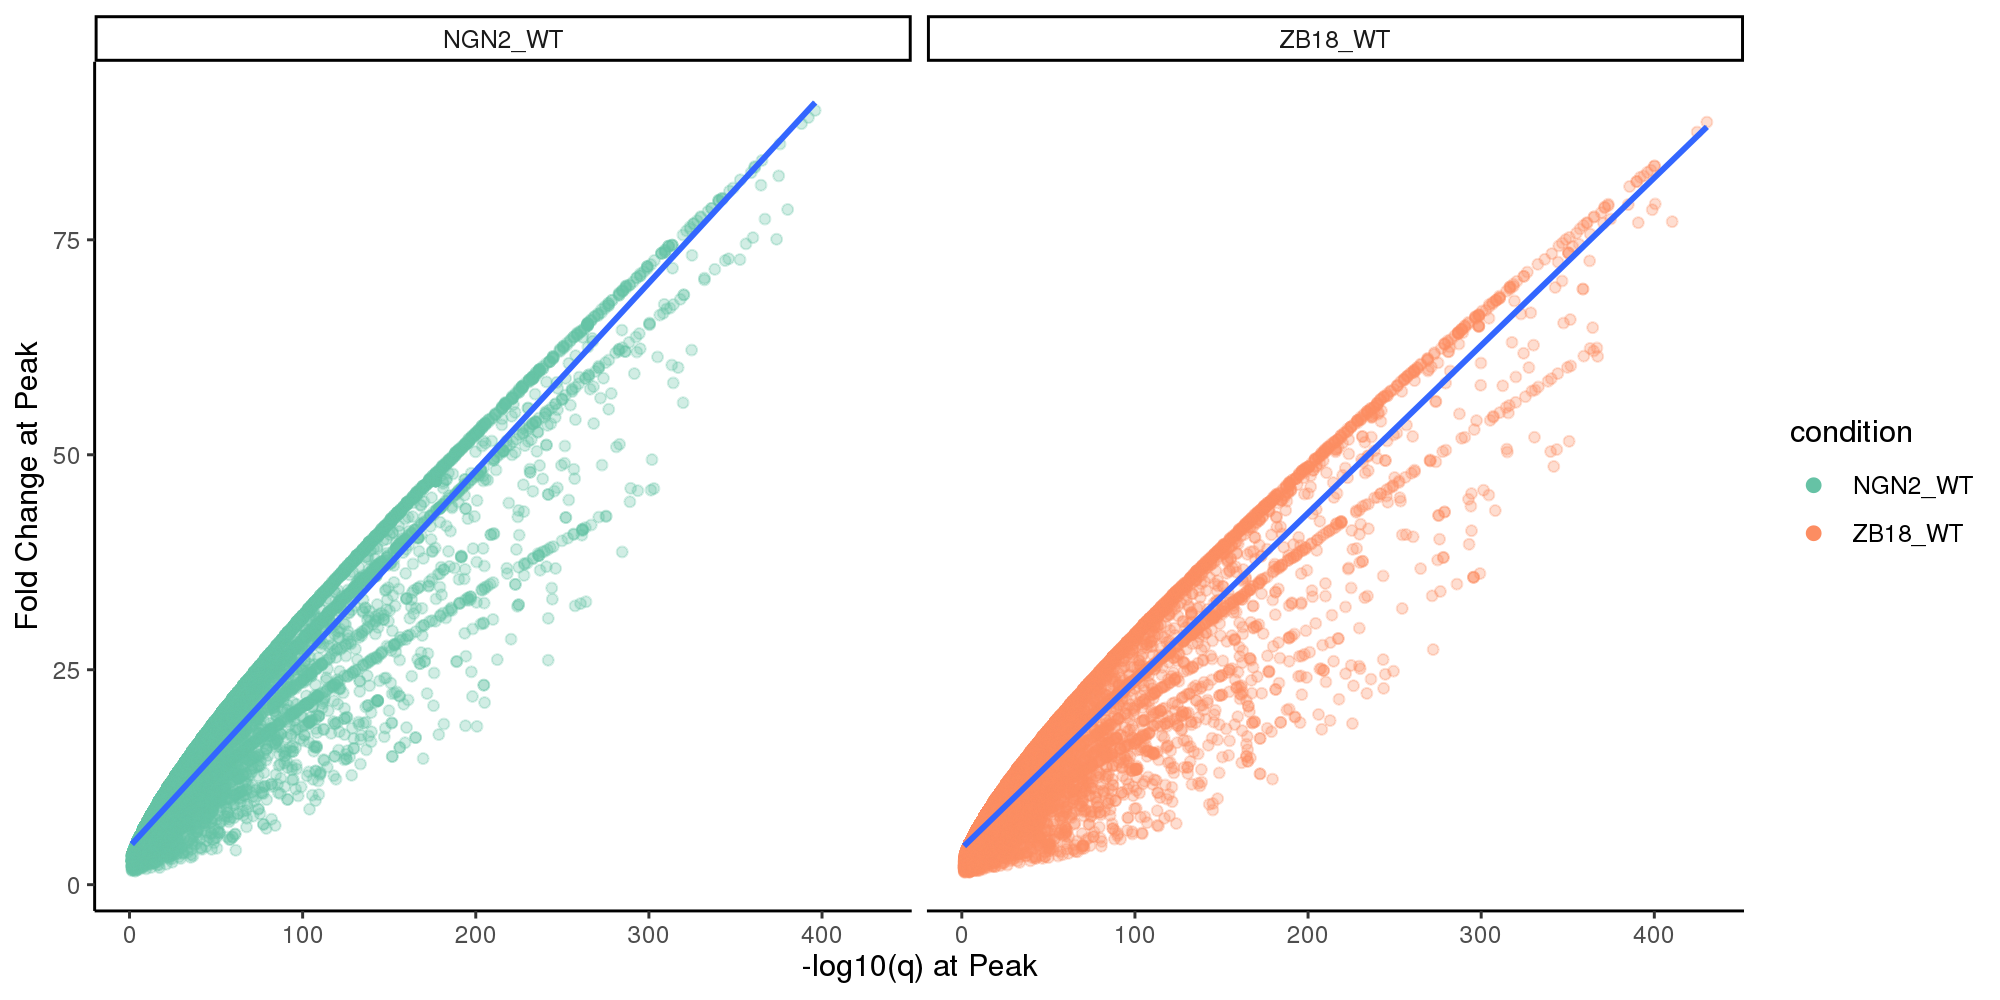

In [380]:
mm.all.peaks %>%
    ggplot() + geom_point(aes(x = q, y = fc, color = condition), alpha = .3, ) +
        geom_smooth(aes(q, fc),method = "lm") +
        plot_settings() +
        guides(color = guide_legend(override.aes = list(alpha = 1, size = 2))) +
        facet_wrap(~ condition) +
        labs(x = "-log10(q) at Peak", y = "Fold Change at Peak") +
        guides(fill = guide_legend(title = NULL))

In [113]:
mm.all.peaks %>% head

chr,start,end,peakname,score,strand,fc,p,q,apex,gene_name,condition
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,3322172,3322369,NGN2_WT_peak_13,29,.,3.94970,5.18069,2.99100,119,XKR4,NGN2_WT
chr1,3507935,3508509,NGN2_WT_peak_14,243,.,9.60012,27.20397,24.38268,374,XKR4,NGN2_WT
chr1,3512633,3513212,NGN2_WT_peak_15,54,.,5.13733,7.82980,5.49612,155,XKR4,NGN2_WT
chr1,4154135,4154674,NGN2_WT_peak_18,1015,.,20.89378,105.11887,101.51904,264,RP1,NGN2_WT
chr1,4774265,4774520,NGN2_WT_peak_30,46,.,4.66227,6.91178,4.61744,82,MRPL15,NGN2_WT
chr1,4786158,4786434,NGN2_WT_peak_31,103,.,3.62972,12.82961,10.33364,85,MRPL15,NGN2_WT


In [136]:
qs <- seq(1, 50, 1)
fcs <- seq(1, 50, 1)

In [139]:
filter(mm.all.peaks, q >= 50 & condition == "ZB18_WT") %>% pull(peakname) %>% length

[1] 4631

In [140]:
x1 <- map(qs, ~ filter(mm.all.peaks, q >= .x & condition == "ZB18_WT") %>% pull(peakname) %>% length)

# Intersect ChIP with computed targets

In [142]:
# first read in target matrix
regulatorMatrix <- read_csv("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen//Interaction_matrix_nofilter_AllTF_20200107.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  regulator_gene = col_character(),
  target_gene = col_character(),
  reg.isHit = col_logical(),
  tar.isHit = col_logical()
)

See spec(...) for full column specifications.



In [178]:
# computed NGN2, ZB18 target genes
computed.NGN2targets <- filter(regulatorMatrix, regulator_gene == "NEUROG2") %>% pull(target_gene) %>% unique
computed.ZB18targets <- filter(regulatorMatrix, regulator_gene == "ZBTB18") %>% pull(target_gene) %>% unique

# number of computed NGN2, ZB18 target genes
computed.NGN2targets.len <- length(computed.NGN2targets)
computed.ZB18targets.len <- length(computed.ZB18targets)

In [165]:
fc.cutoffs <- seq(1, 50, 1) # a vector of fold change cutoffs

In [166]:
# for each fc cutoff, get ChIP targets
NGN2_WT.targets.per.fc <- map(fc.cutoffs, ~ filter(mm.all.peaks, fc >= .x & condition == "NGN2_WT") %>% 
                                              pull(gene_name) %>% 
                                              unique)
ZB18_WT.targets.per.fc <- map(fc.cutoffs, ~ filter(mm.all.peaks, fc >= .x & condition == "ZB18_WT") %>% 
                                              pull(gene_name) %>% 
                                              unique)

In [187]:
# for each fc cutoff, get the intersection of ChIP targets and computed targets
NGN2.inter.targets.per.fc <- map(NGN2_WT.targets.per.fc, ~ intersect(.x, computed.NGN2targets))
ZB18.inter.targets.per.fc <- map(ZB18_WT.targets.per.fc, ~ intersect(.x, computed.ZB18targets))

In [188]:
# for each group of intersected targets, get the number of genes
NGN2.num.inter.targets.per.fc <- map_dbl(NGN2.inter.targets.per.fc, length)
ZB18.num.inter.targets.per.fc <- map_dbl(ZB18.inter.targets.per.fc, length)

In [197]:
# store previous anlaysis in a df
fc.cutoff.df <- data.frame("fc" = fc.cutoffs, "NGN2" = NGN2.num.inter.targets.per.fc, "ZB18" = ZB18.num.inter.targets.per.fc, 
                           "NGN2.perc" = NGN2.num.inter.targets.per.fc / computed.NGN2targets.len, 
                           "ZB18.perc" = ZB18.num.inter.targets.per.fc / computed.ZB18targets.len)

In [199]:
fc.cutoff.df %>% head

,fc,NGN2,ZB18,NGN2.perc,ZB18.perc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,417,360,0.5881523,0.6282723
2,2,417,359,0.5881523,0.6265271
3,3,414,352,0.5839210,0.6143106
4,4,400,344,0.5641749,0.6003490
5,5,378,319,0.5331453,0.5567190
6,6,346,296,0.4880113,0.5165794


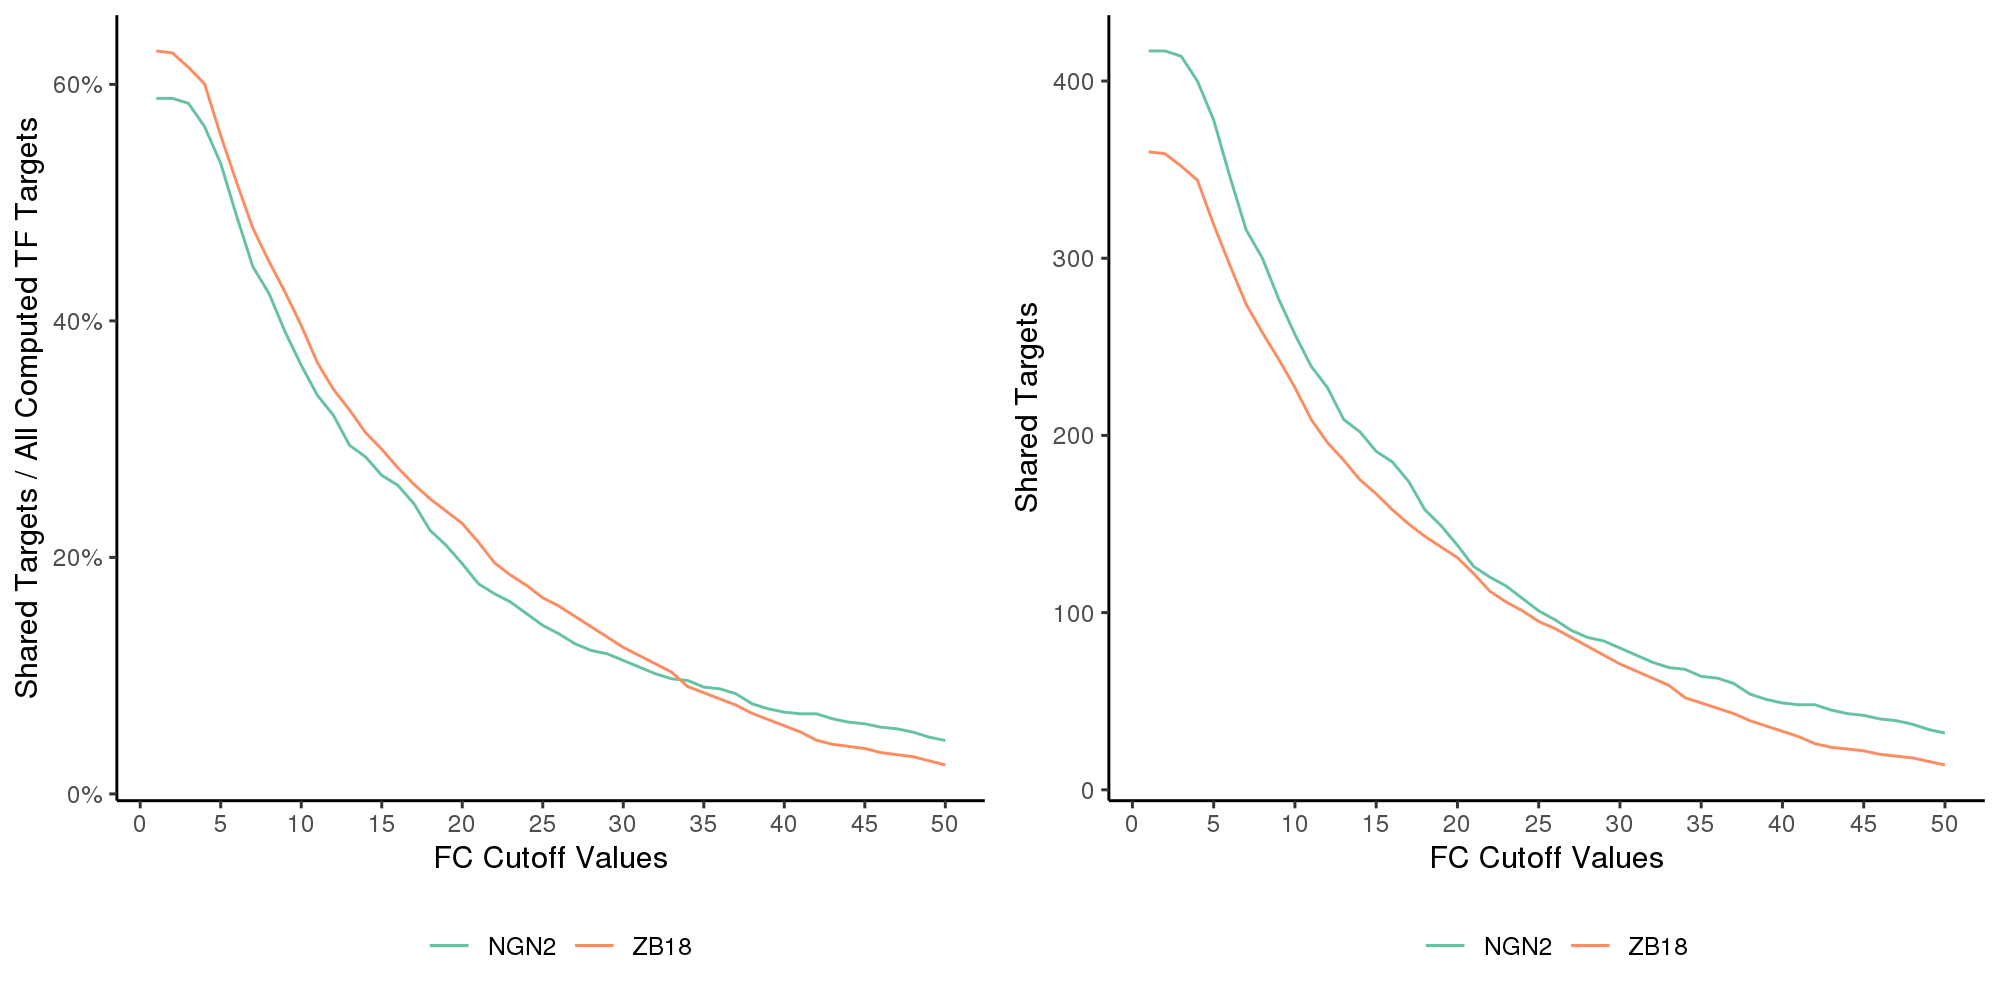

In [223]:
g1 <- ggplot(fc.cutoff.df) + geom_line(aes(x = fc, y = NGN2.perc, color = "NGN2")) +
        geom_line(aes(x = fc, y = ZB18.perc, color = "ZB18")) +
        plot_settings() +
        scale_x_continuous(breaks = seq(0, 50, 5)) +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "FC Cutoff Values", y = "Shared Targets / All Computed TF Targets") +
        guides(color = guide_legend(title = NULL)) +
        theme(legend.position = "bottom")

g2 <- ggplot(fc.cutoff.df) + geom_line(aes(x = fc, y = NGN2, color = "NGN2")) +
        geom_line(aes(x = fc, y = ZB18, color = "ZB18")) +
        plot_settings() +
        scale_x_continuous(breaks = seq(0, 50, 5)) +
        labs(x = "FC Cutoff Values", y = "Shared Targets") +
        guides(color = guide_legend(title = NULL)) +
        theme(legend.position = "bottom")

gridExtra::grid.arrange(g1, g2, nrow = 1)

## FC cutoff at 4, at this cutoff, resulted peaks having minimum q = 2.8, or 0.00145, very small still. And only about 500 peaks have having q smaller than that. In addition, previous plot shows q and FC are HIGHLY correlated. Thus, it's safe to just use FC cutoff alone. Here we set FC cutoff at 4. 


In [250]:
getwd()

[1] "/gpfs/commons/home/cdai/notebooks/TFscreen"

In [253]:
# NGN2 ChIP targets at FC >= 4, this is not intersected with computed targets yet!

NGN2.chip.targets <- filter(mm.all.peaks, fc >= 4 & condition %in% c("NGN2_WT")) %>%
                        select(gene_name) %>% unique
ZB18.chip.targets <- filter(mm.all.peaks, fc >= 4 & condition %in% c("ZB18_WT")) %>%
                        select(gene_name) %>% unique

In [257]:
# write to file
NGN2.chip.targets %>% write_csv("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/mouse_chip_mazzoni/NGN2_WT_targets.csv")
ZB18.chip.targets %>% write_csv("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/mouse_chip_mazzoni/ZB18_WT_targets.csv")

In [263]:
library(forcats)

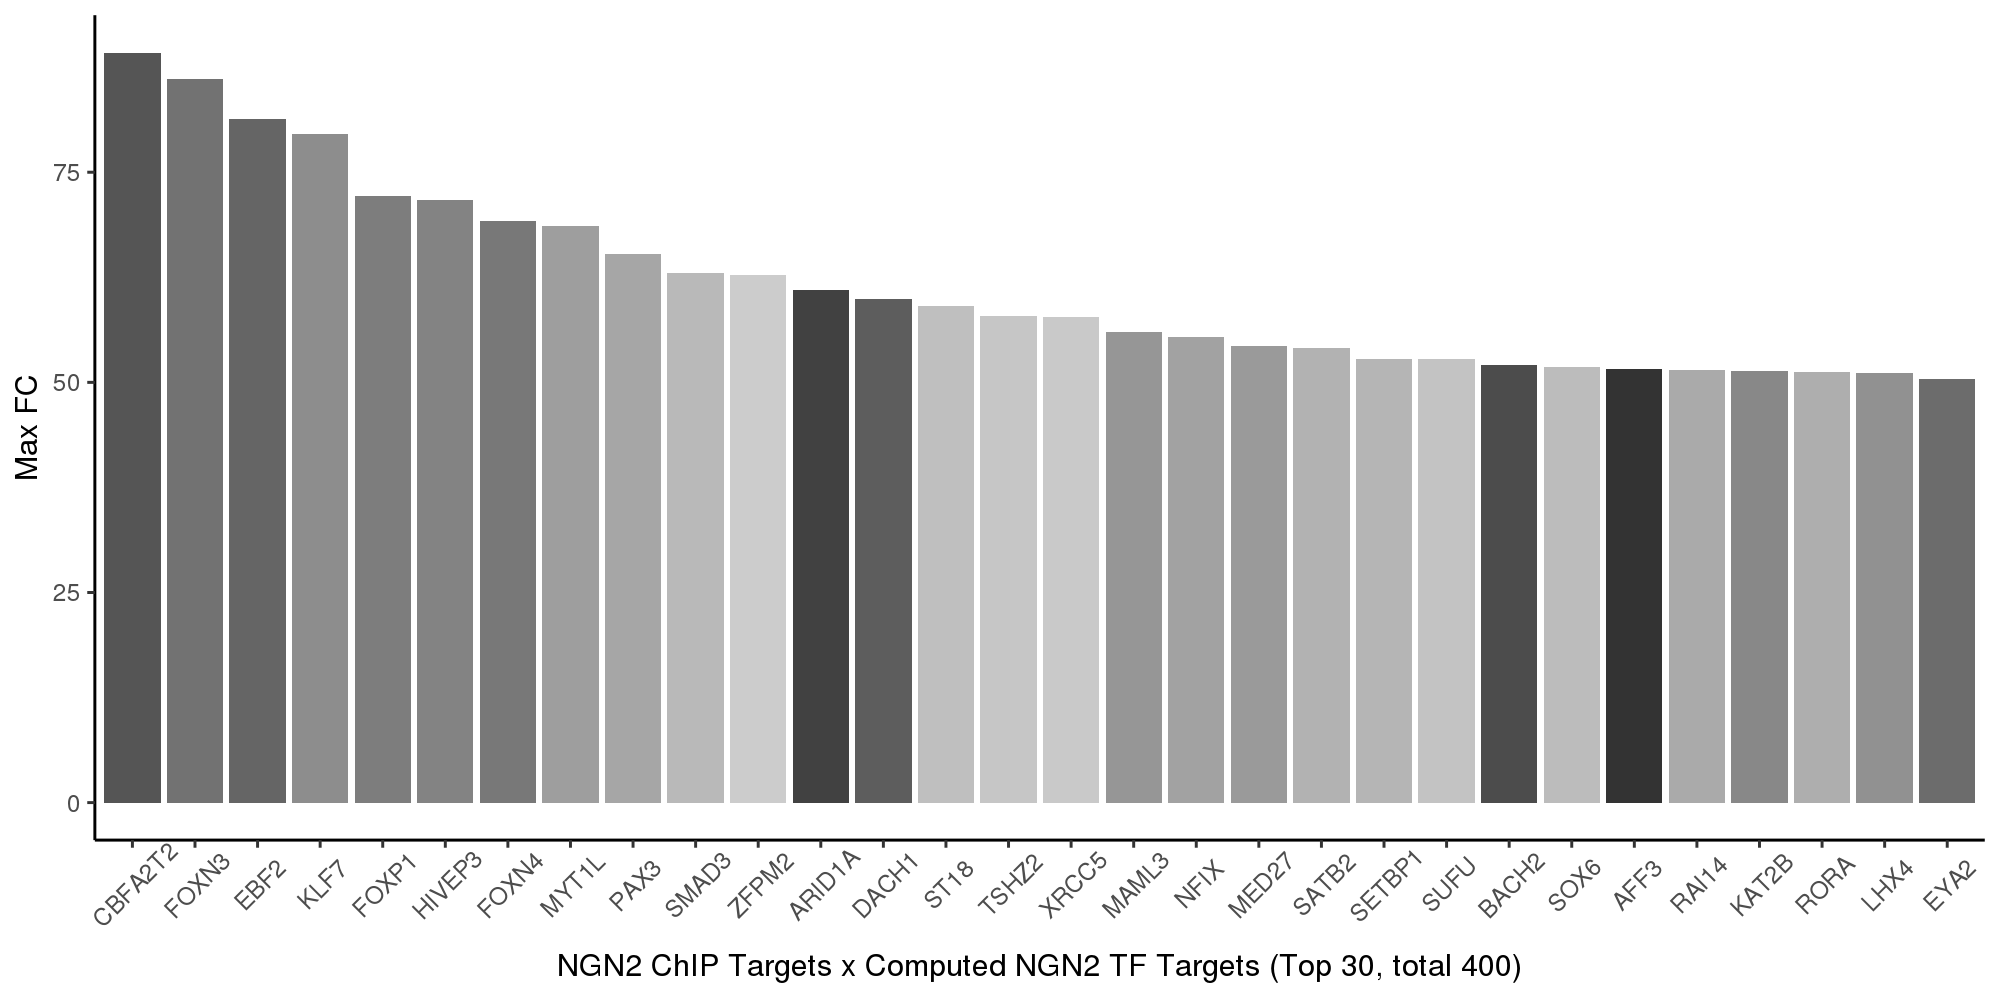

In [306]:
# shared targets between chip (fc >= 4) and computed targets
filter(mm.all.peaks, fc >= 4 & condition %in% c("NGN2_WT") & gene_name %in% NGN2.inter.targets.per.fc[[4]]) %>%
    select(gene_name, fc, q) %>% group_by(gene_name) %>% summarise(max.fc = max(fc)) %>% top_n(30, wt = max.fc) %>%
    ggplot() + geom_col(aes(x = fct_reorder(gene_name, -max.fc), y = max.fc, fill = gene_name)) +
        labs(x = "NGN2 ChIP Targets x Computed NGN2 TF Targets (Top 30, total 400)", y = "Max FC") +
        scale_fill_grey() +
        theme_classic() +
        theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = .7))

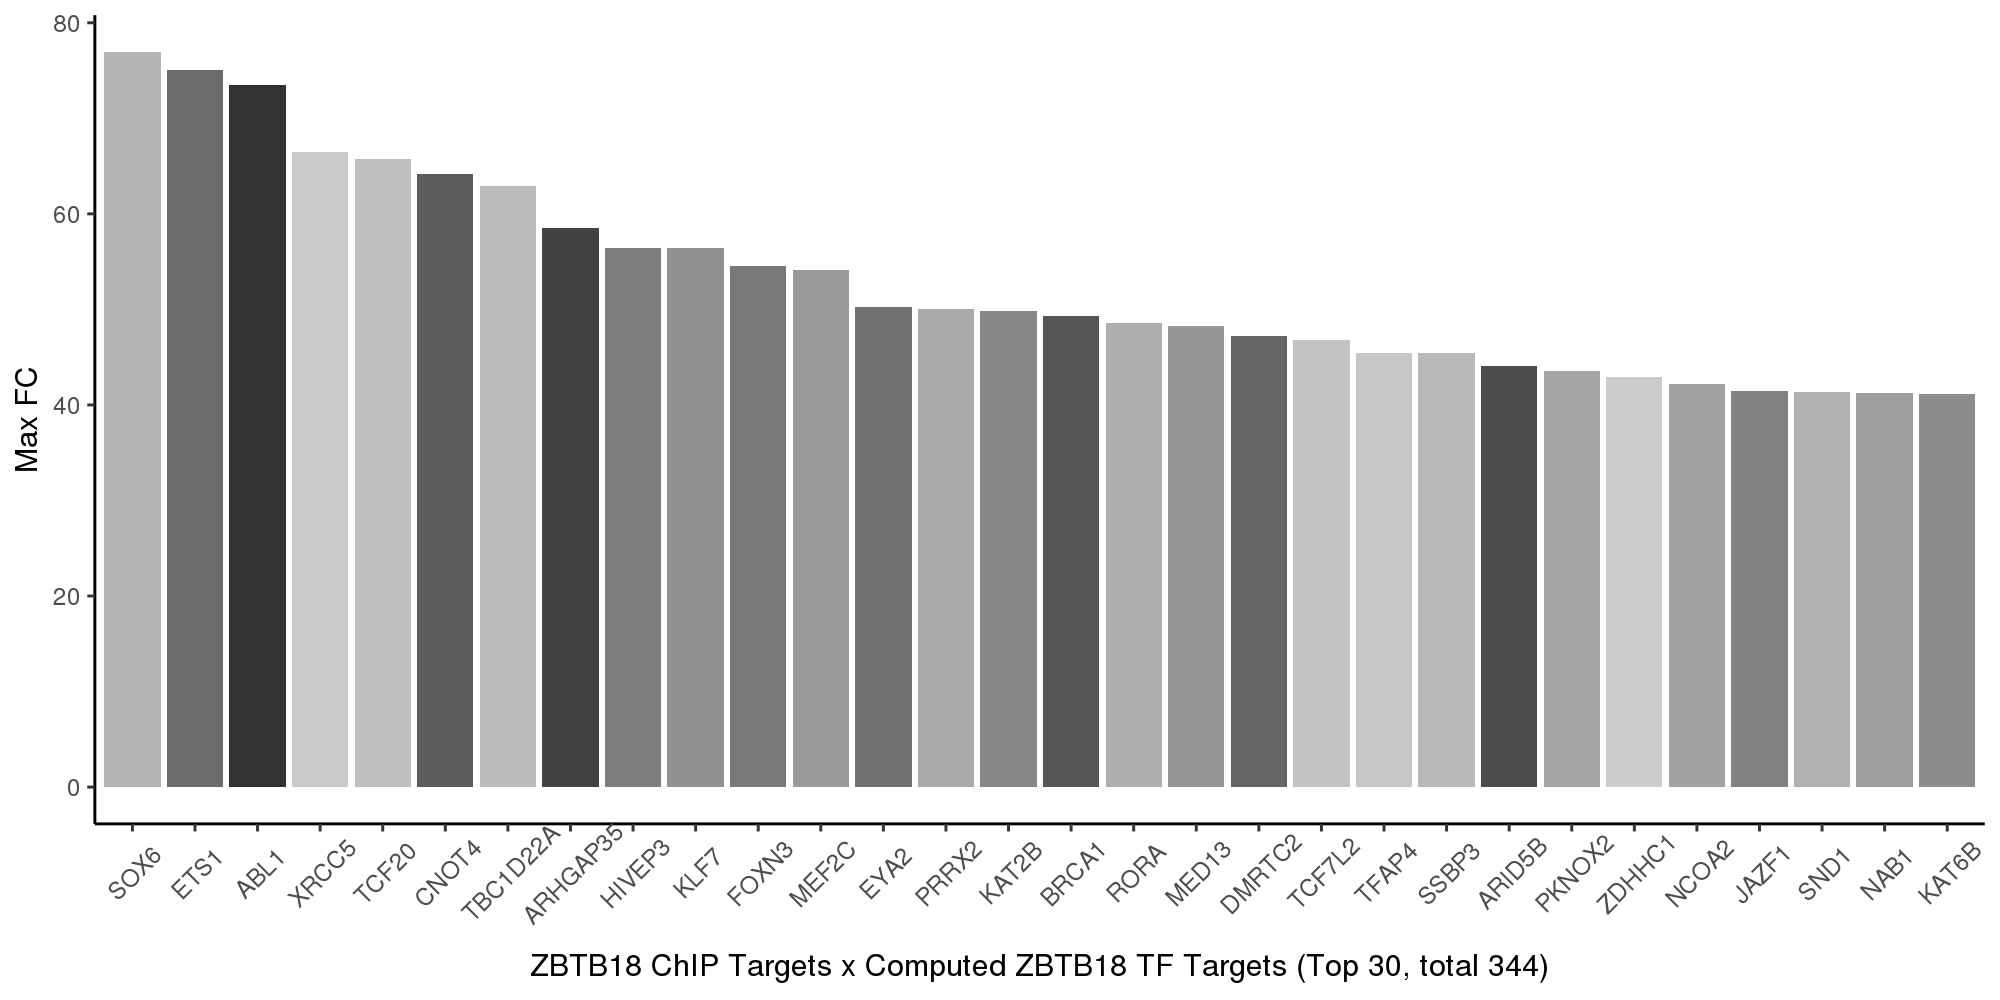

In [304]:
# shared targets between chip (fc >= 4) and computed targets
filter(mm.all.peaks, fc >= 4 & condition %in% c("ZB18_WT") & gene_name %in% ZB18.inter.targets.per.fc[[4]]) %>%
    select(gene_name, fc, q) %>% group_by(gene_name) %>% summarise(max.fc = max(fc)) %>% top_n(30, wt = max.fc) %>%
    ggplot() + geom_col(aes(x = fct_reorder(gene_name, -max.fc), y = max.fc, fill = gene_name)) +
        labs(x = "ZBTB18 ChIP Targets x Computed ZBTB18 TF Targets (Top 30, total 344)", y = "Max FC") +
        scale_fill_grey() +
        theme_classic() +
        theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = .7))

In [301]:
intersect(ZB18.inter.targets.per.fc[[4]], NGN2.inter.targets.per.fc[[4]]) %>% length

[1] 233

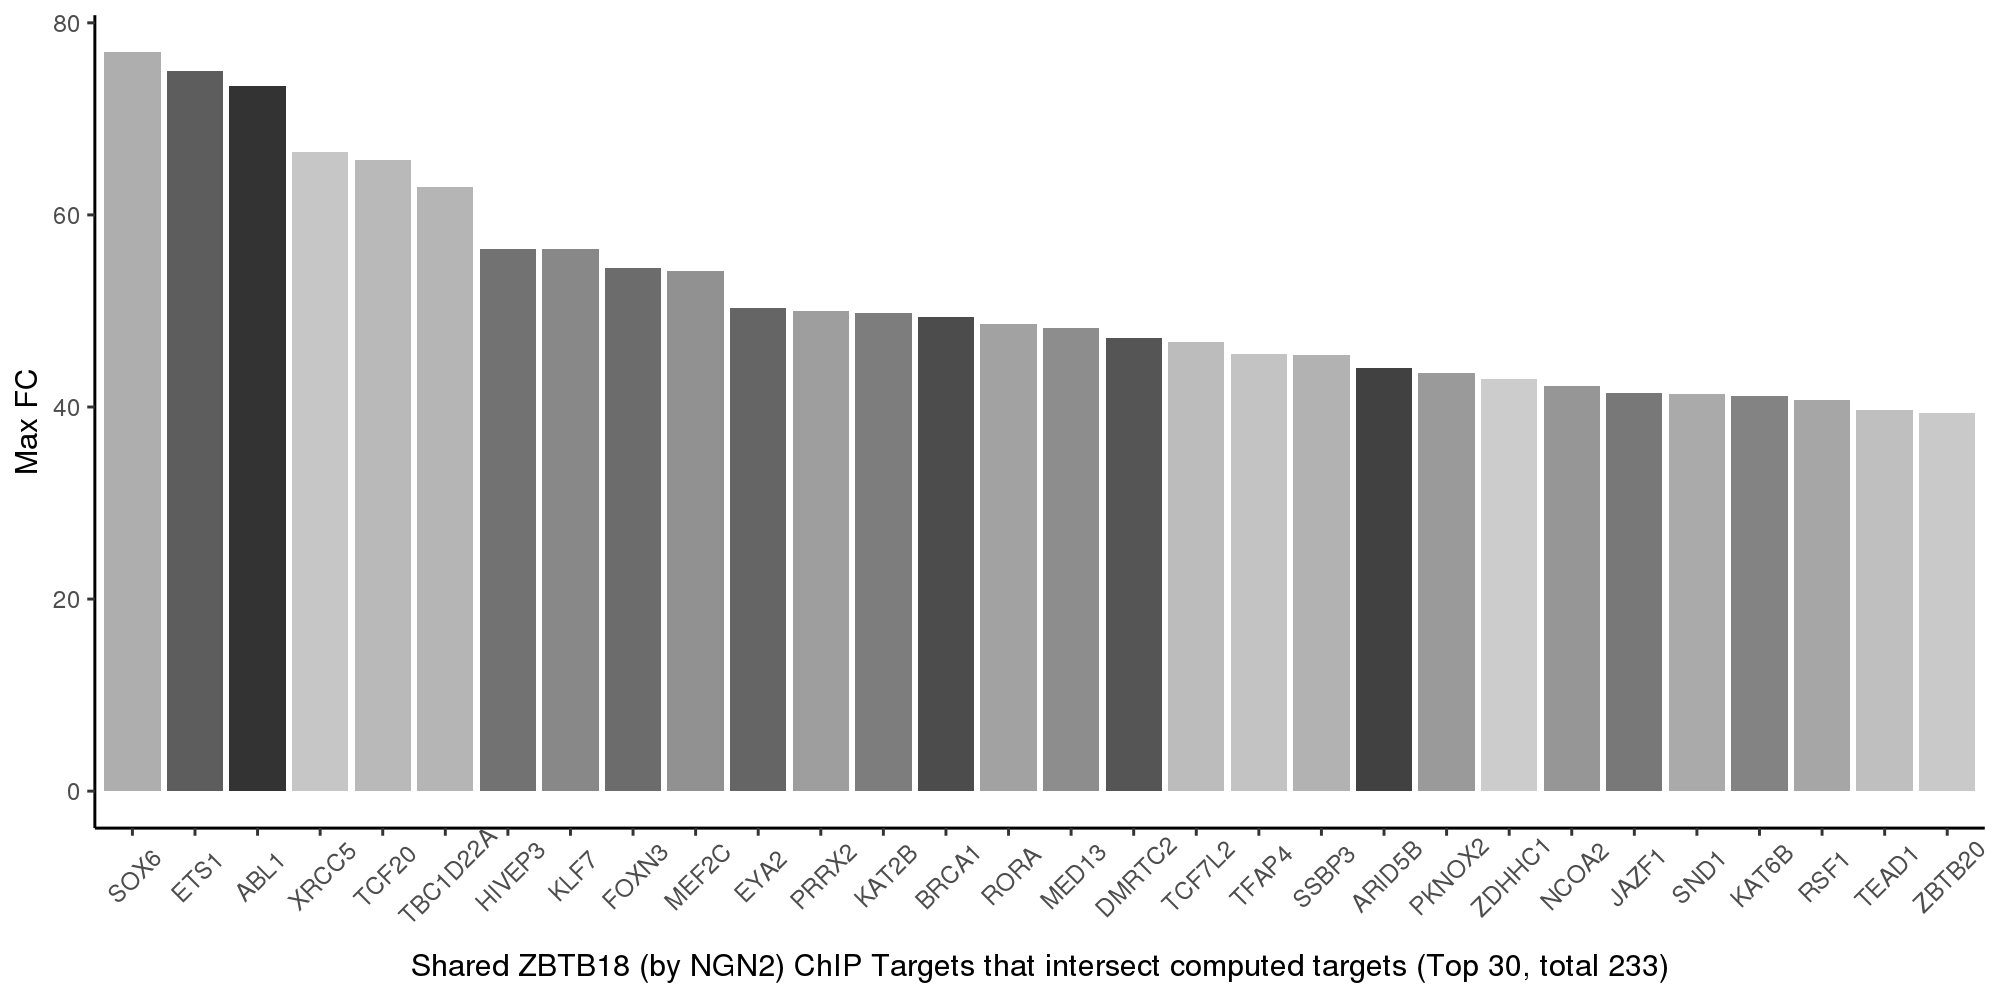

In [315]:
# shared targets between chip (fc >= 4) and computed targets
filter(mm.all.peaks, fc >= 4 & condition %in% c("ZB18_WT") & gene_name %in% intersect(ZB18.inter.targets.per.fc[[4]], NGN2.inter.targets.per.fc[[4]])) %>%
    select(gene_name, fc, q) %>% group_by(gene_name) %>% summarise(max.fc = max(fc)) %>% top_n(30, wt = max.fc) %>%
    ggplot() + geom_col(aes(x = fct_reorder(gene_name, -max.fc), y = max.fc, fill = gene_name)) +
        labs(x = "Shared ZBTB18 (by NGN2) ChIP Targets that intersect computed targets (Top 30, total 233)", y = "Max FC") +
        scale_fill_grey() +
        theme_classic() +
        theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = .7))

In [308]:
setdiff(ZB18.inter.targets.per.fc[[4]], NGN2.inter.targets.per.fc[[4]]) %>% length

[1] 111

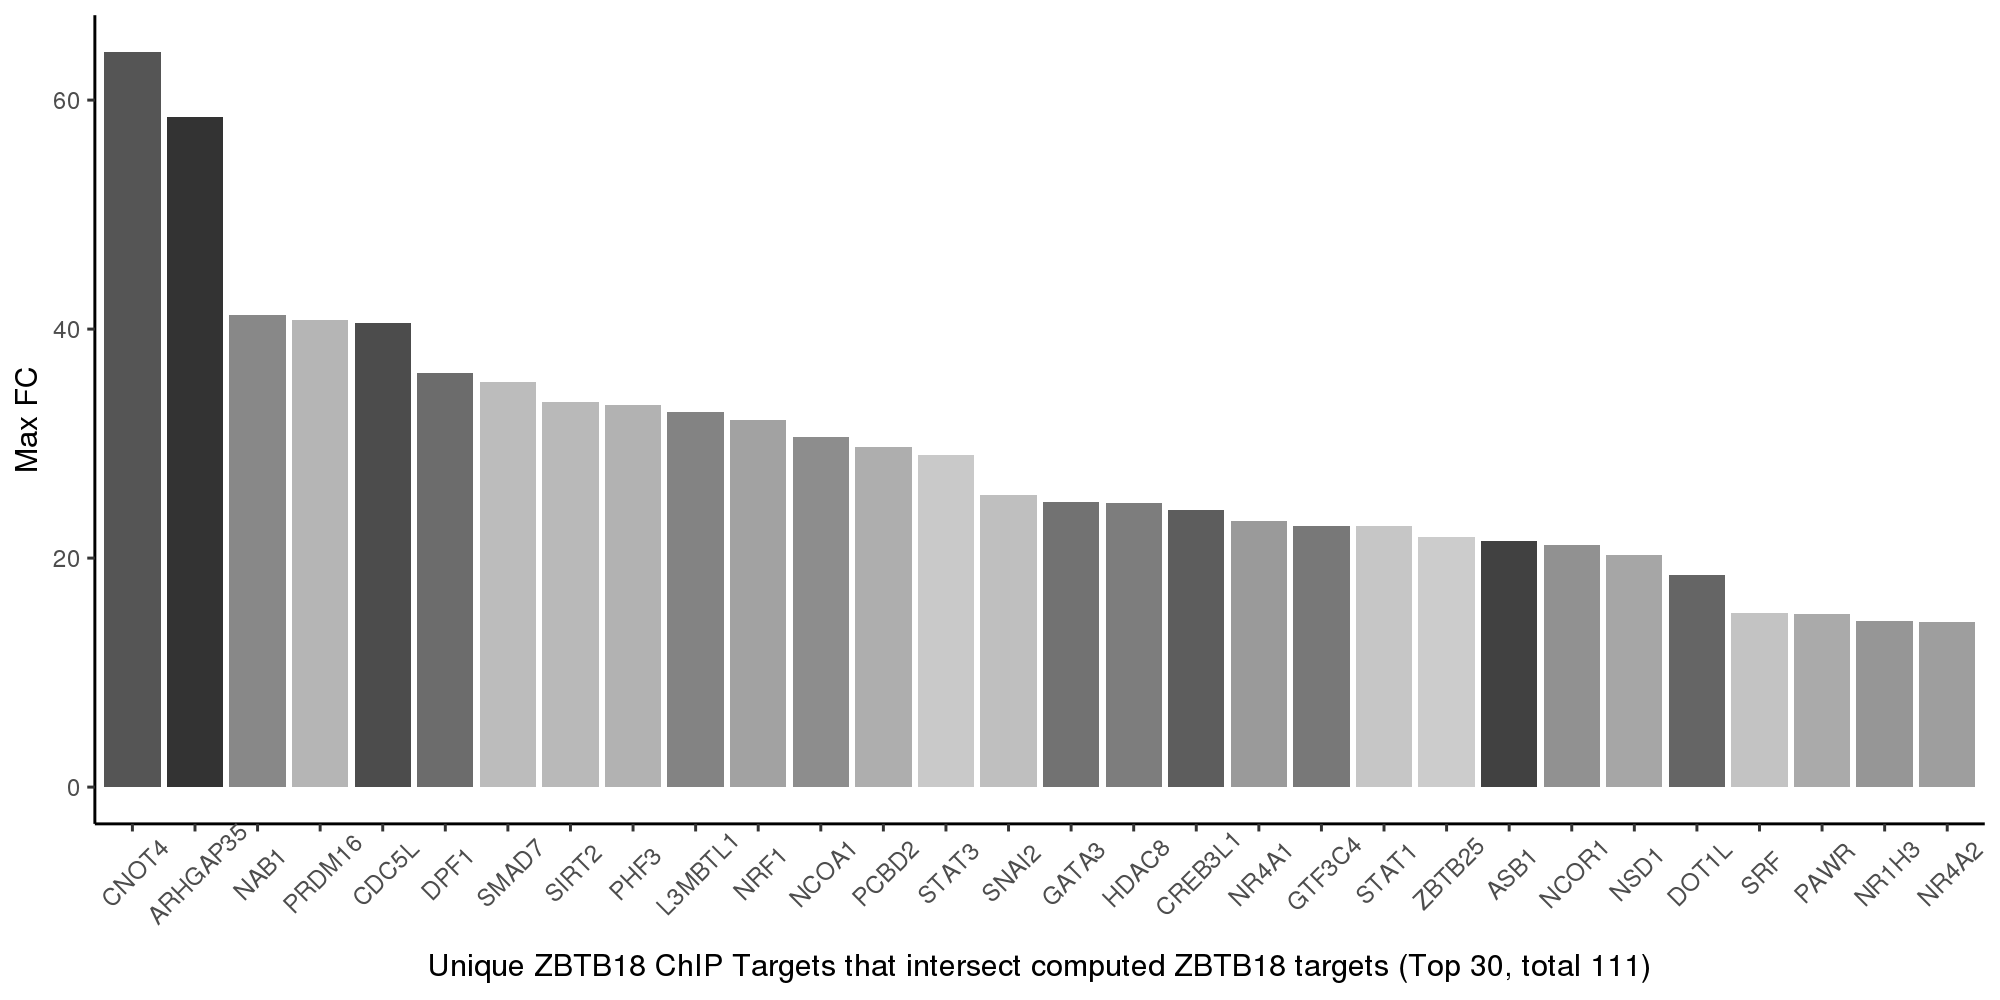

In [310]:
# shared targets between chip (fc >= 4) and computed targets
filter(mm.all.peaks, fc >= 4 & condition %in% c("ZB18_WT") & gene_name %in% setdiff(ZB18.inter.targets.per.fc[[4]], NGN2.inter.targets.per.fc[[4]])) %>%
    select(gene_name, fc, q) %>% group_by(gene_name) %>% summarise(max.fc = max(fc)) %>% top_n(30, wt = max.fc) %>%
    ggplot() + geom_col(aes(x = fct_reorder(gene_name, -max.fc), y = max.fc, fill = gene_name)) +
        labs(x = "Unique ZBTB18 ChIP Targets that intersect computed ZBTB18 targets (Top 30, total 111)", y = "Max FC") +
        scale_fill_grey() +
        theme_classic() +
        theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = .7))

In [313]:
setdiff( NGN2.inter.targets.per.fc[[4]], ZB18.inter.targets.per.fc[[4]]) %>% length

[1] 167

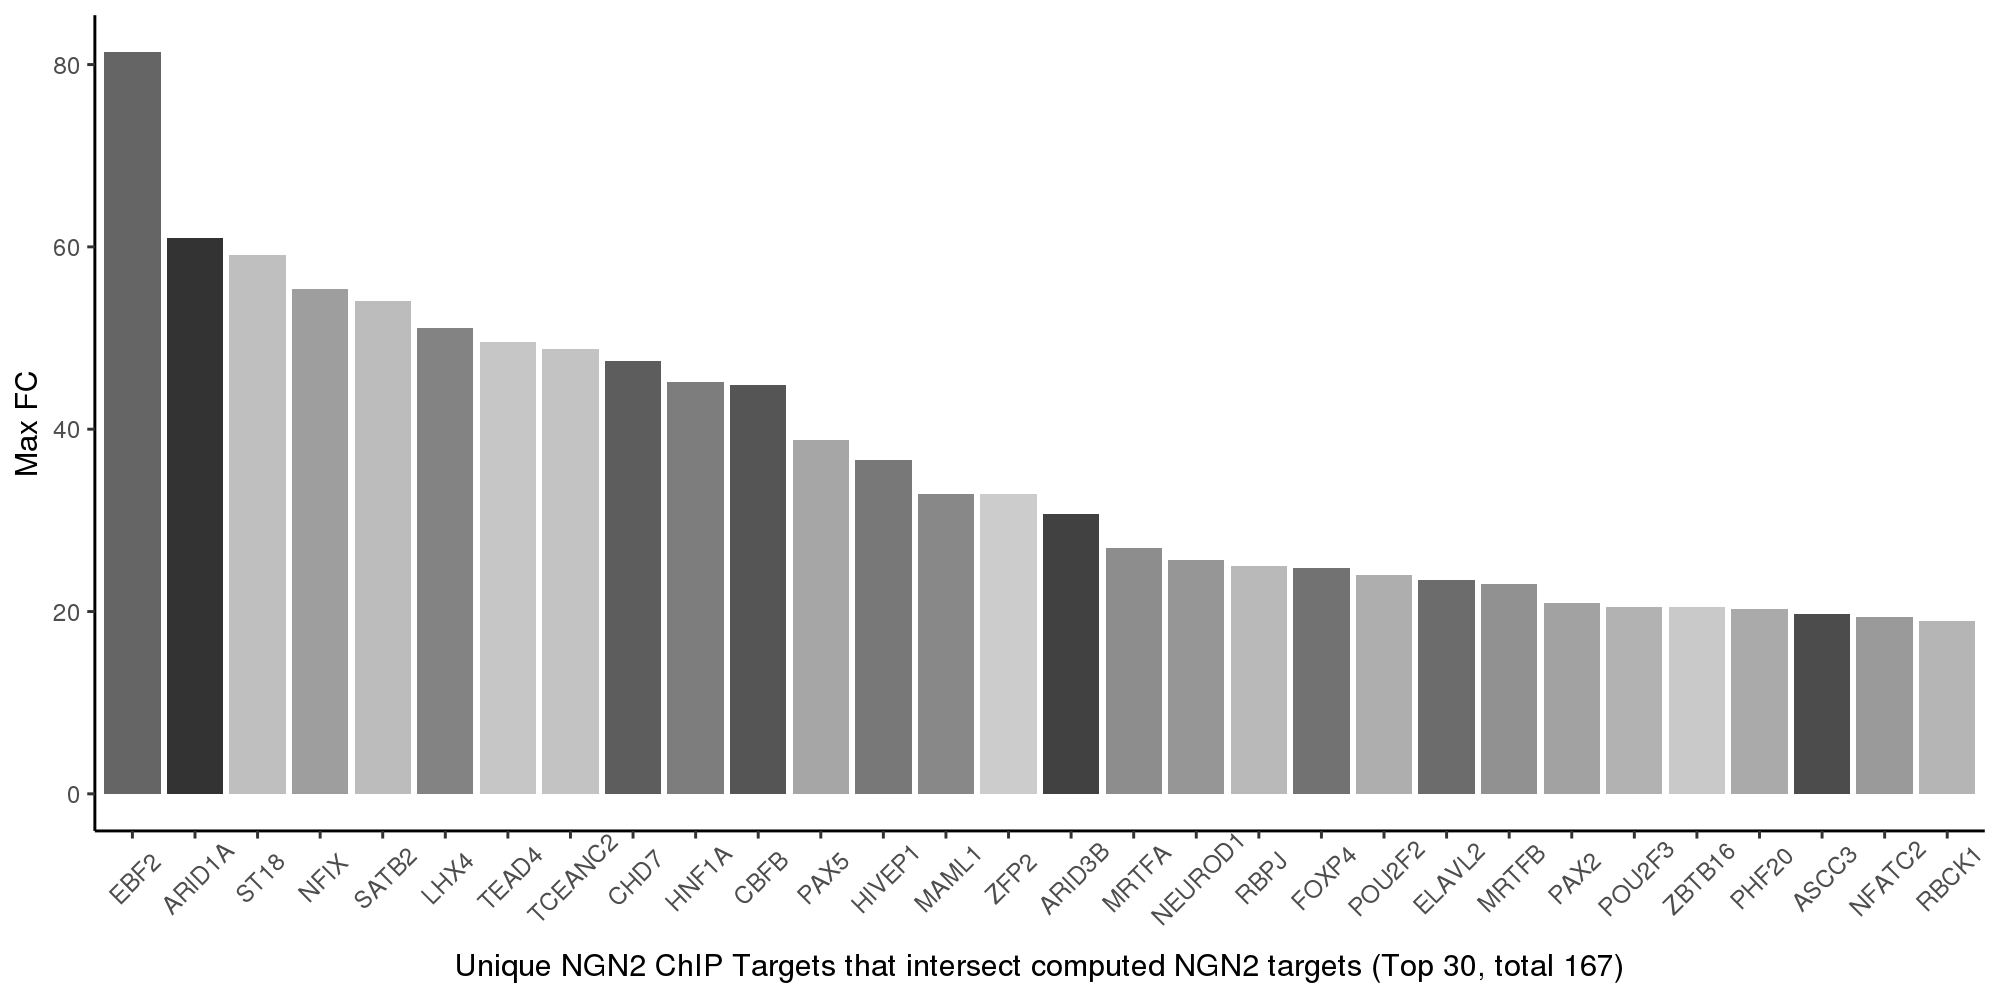

In [314]:
# shared targets between chip (fc >= 4) and computed targets
filter(mm.all.peaks, fc >= 4 & condition %in% c("NGN2_WT") & gene_name %in% setdiff( NGN2.inter.targets.per.fc[[4]], ZB18.inter.targets.per.fc[[4]])) %>%
    select(gene_name, fc, q) %>% group_by(gene_name) %>% summarise(max.fc = max(fc)) %>% top_n(30, wt = max.fc) %>%
    ggplot() + geom_col(aes(x = fct_reorder(gene_name, -max.fc), y = max.fc, fill = gene_name)) +
        labs(x = "Unique NGN2 ChIP Targets that intersect computed NGN2 targets (Top 30, total 167)", y = "Max FC") +
        scale_fill_grey() +
        theme_classic() +
        theme(legend.position = "none", axis.text.x = element_text(angle = 45, vjust = .7))

# meme result - mouse

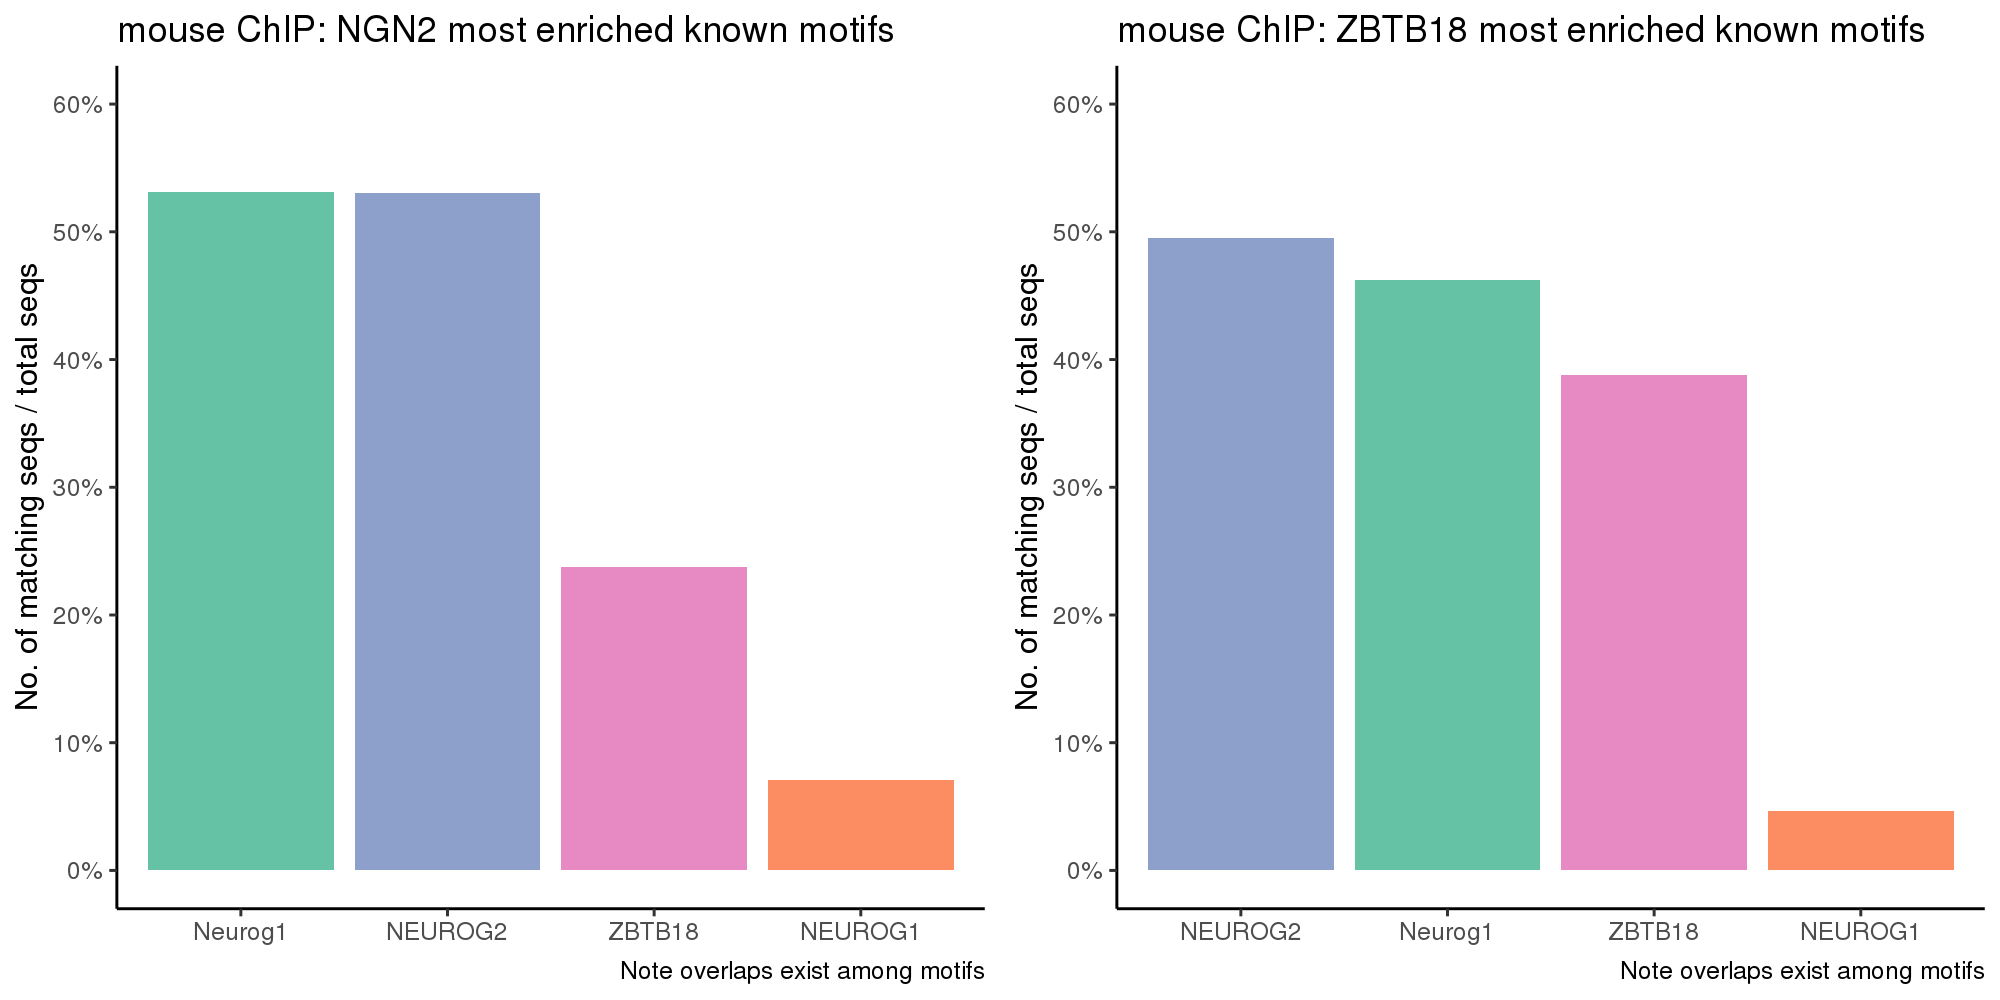

In [418]:
#meme_ngn2 centrimo result: 
g1 <- tribble(~ NEUROG2, ~NEUROG1, ~Neurog1, ~ZBTB18,
               0.5303, 0.0708, 0.531, 0.2375) %>% 
            pivot_longer(cols = c("NEUROG2", "NEUROG1", "Neurog1", "ZBTB18"), values_to = "perc") %>%
            ggplot() + geom_col(aes(fct_reorder(name, -perc), perc, fill = name)) +
                plot_settings() +
                coord_cartesian(ylim = c(0,.6)) +
                scale_y_continuous(breaks = seq(0, 1, .1), labels = scales::percent_format(accuracy = 1)) +
                labs(x = NULL, y = "No. of matching seqs / total seqs", caption = "Note overlaps exist among motifs",
                     title = "mouse ChIP: NGN2 most enriched known motifs") +
                theme(legend.position = "none")

#meme_zbtb18 centrimo result
g2 <- tribble(~ NEUROG2, ~NEUROG1, ~Neurog1, ~ZBTB18,
           0.495228398364022, 0.0467668731772137, 0.462388044247329, 0.387509275717466) %>% 
         pivot_longer(cols = c("NEUROG2", "NEUROG1", "Neurog1", "ZBTB18"), values_to = "perc") %>%
         ggplot() + geom_col(aes(fct_reorder(name, -perc), perc, fill = name)) +
            plot_settings() +
            coord_cartesian(ylim = c(0, .6)) +
            scale_y_continuous(breaks = seq(0, 1, .1), labels = scales::percent_format(accuracy = 1)) +
            labs(x = NULL, y = "No. of matching seqs / total seqs", caption = "Note overlaps exist among motifs", 
                 title = "mouse ChIP: ZBTB18 most enriched known motifs") +
            theme(legend.position = "none")

gridExtra::grid.arrange(g1, g2, nrow = 1)

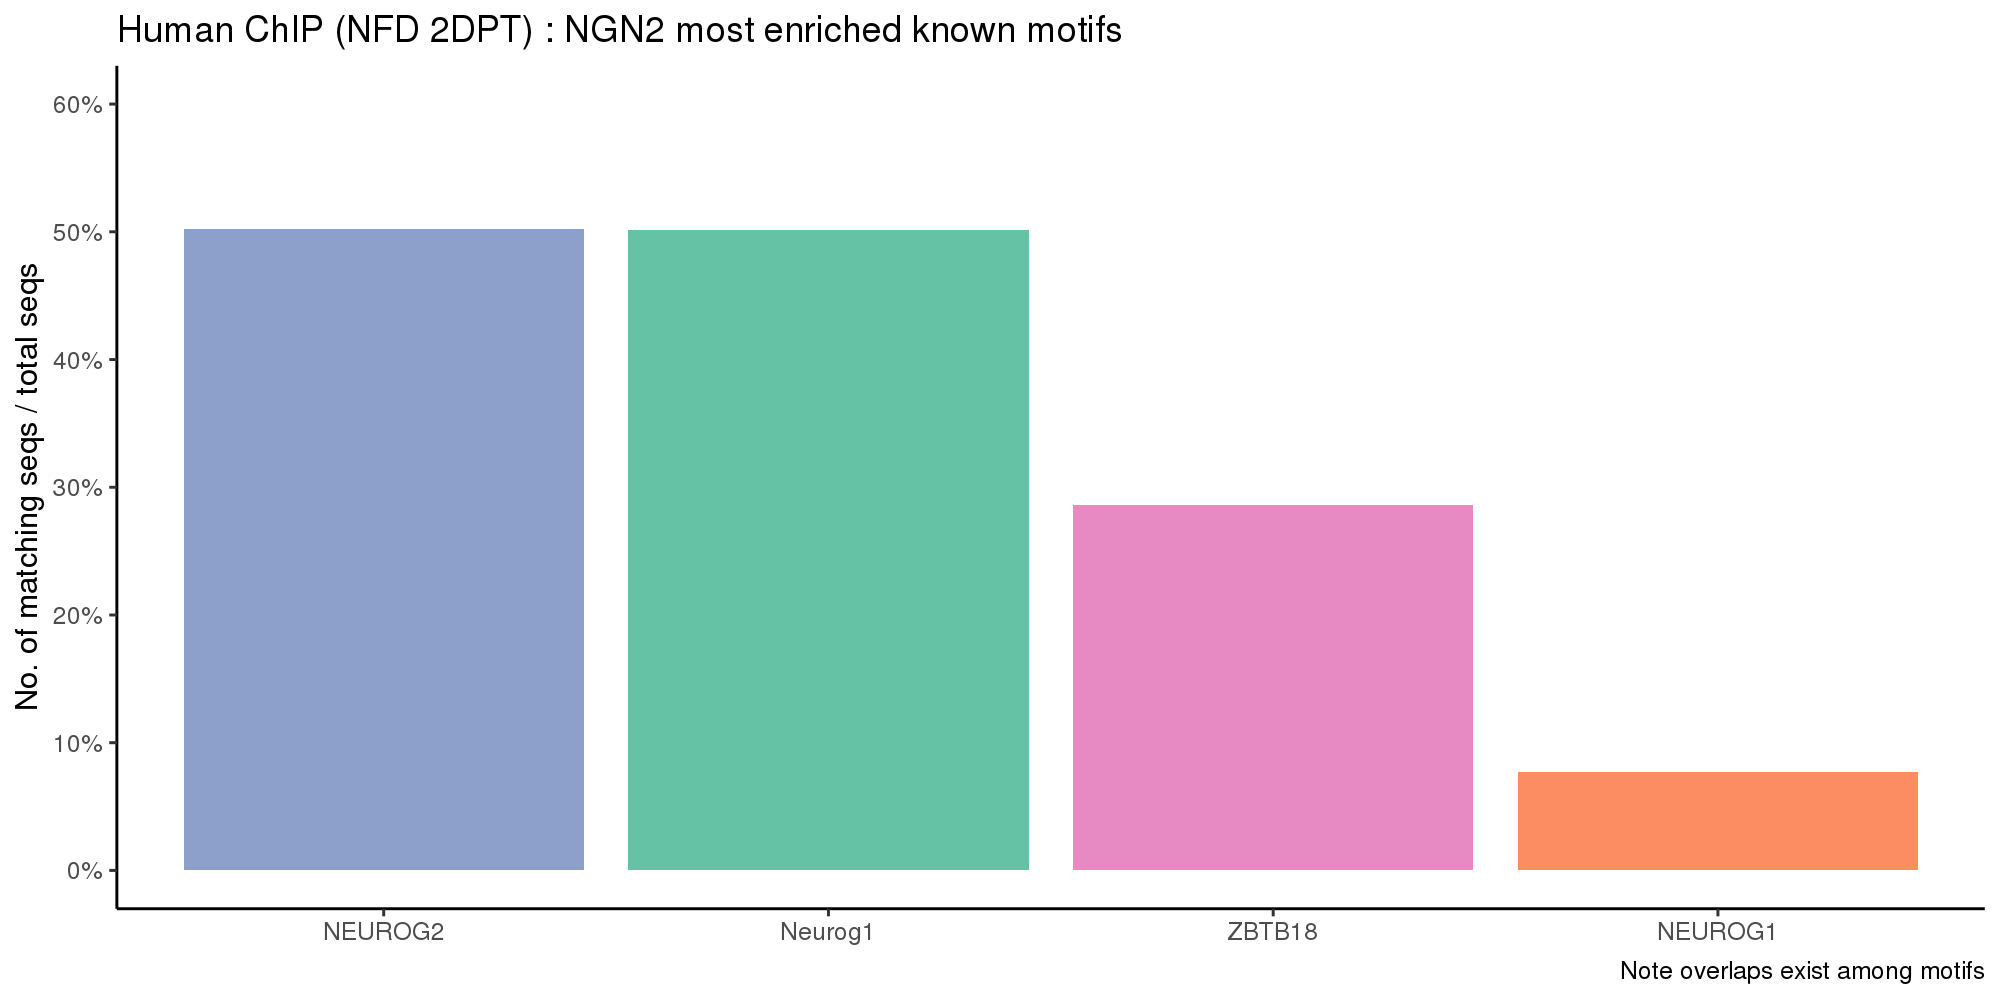

In [420]:
# human NGN2 ChIP NFD_2DP
tribble(~ NEUROG2, ~NEUROG1, ~Neurog1, ~ZBTB18,
               0.502328203629074, 0.0769664446346913, 0.501221523877138, 0.286170679250799) %>% 
         pivot_longer(cols = c("NEUROG2", "NEUROG1", "Neurog1", "ZBTB18"), values_to = "perc") %>%
         ggplot() + geom_col(aes(fct_reorder(name, -perc), perc, fill = name)) +
            plot_settings() +
            coord_cartesian(ylim = c(0, .6)) +
            scale_y_continuous(breaks = seq(0, 1, .1), labels = scales::percent_format(accuracy = 1)) +
            labs(x = NULL, y = "No. of matching seqs / total seqs", caption = "Note overlaps exist among motifs", 
                 title = "Human ChIP (NFD 2DPT) : NGN2 most enriched known motifs") +
            theme(legend.position = "none")

In [369]:
?t.test

t.test {stats},R Documentation
x,a (non-empty) numeric vector of data values.
y,an optional (non-empty) numeric vector of data values.
alternative,"a character string specifying the alternative hypothesis, must be one of ""two.sided"" (default), ""greater"" or ""less"". You can specify just the initial letter."
mu,a number indicating the true value of the mean (or difference in means if you are performing a two sample test).
paired,a logical indicating whether you want a paired t-test.
var.equal,a logical variable indicating whether to treat the two variances as being equal. If TRUE then the pooled variance is used to estimate the variance otherwise the Welch (or Satterthwaite) approximation to the degrees of freedom is used.
conf.level,confidence level of the interval.
formula,a formula of the form lhs ~ rhs where lhs is a numeric variable giving the data values and rhs a factor with two levels giving the corresponding groups.
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.
